# PYTHON k-NEAREST NEIGHBORS DEMO

### kNN REGRESSION

#### TRAINING DATASET

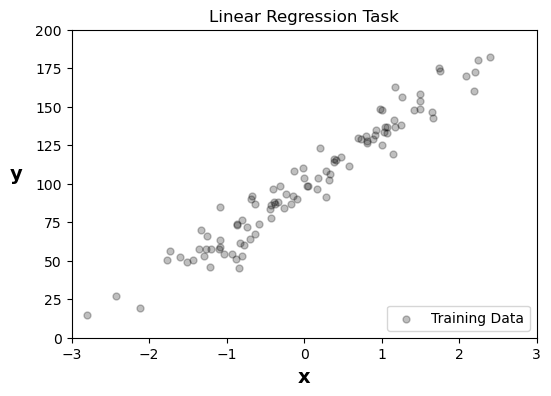

In [9]:
# Create Regression Task
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, bias=100, noise=10, random_state=123)

# Reshape Training Data
X_train, y_train = X.reshape(-1,1), y.reshape(-1,1)

# Plot Training Data
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Linear Regression Task')
plt.scatter(X_train, y_train, color='#000000', marker='o', s=25, alpha=0.25, label='Training Data')
plt.legend(loc='lower right')
plt.xlabel("x", fontsize=14, weight='bold')
plt.ylabel("y    ", fontsize=14, weight='bold', rotation='horizontal')
plt.xlim(-3,3)
plt.ylim(0,200)
plt.show()

#### FIT kNN REGRESSOR

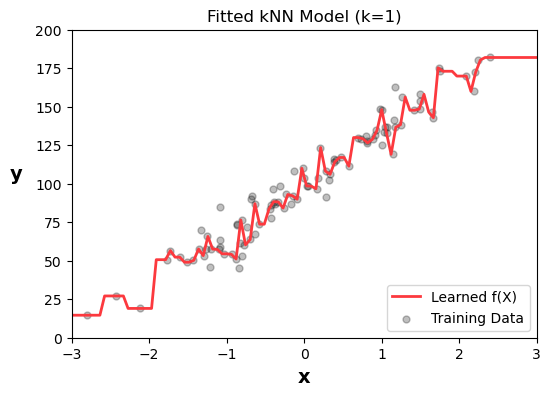

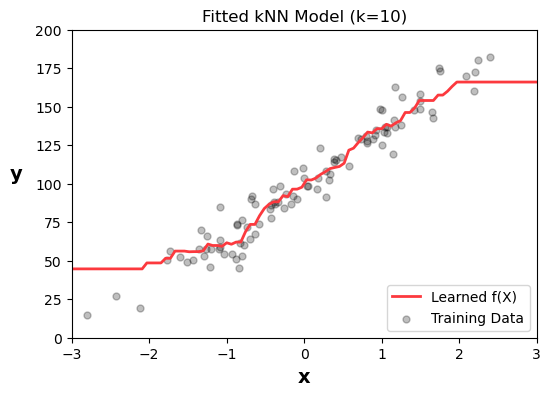

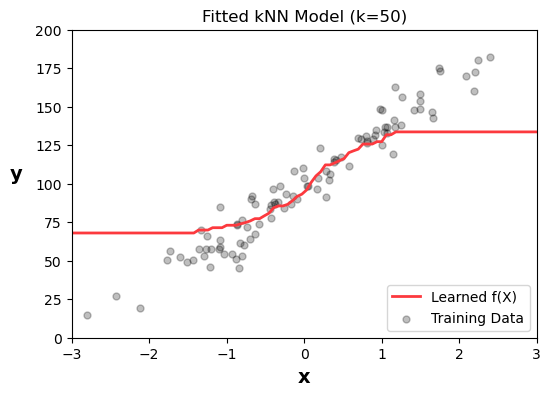

In [10]:
list_k = [1, 10, 50]

for value in list_k:
    
    # Fit kNN Regression Model
    from sklearn.neighbors import KNeighborsRegressor
    
    model = KNeighborsRegressor(n_neighbors=value)
    model.fit(X_train, y_train)
    
    # Use Fitted Model to Make Predictions on the whole Feature Space from -3 to +3
    import numpy as np
    
    X_space = np.linspace(-3,3,100).reshape(-1,1)
    y_pred = model.predict(X_space).reshape(-1,1)
    
    # Plot Training Data and the Fitted Model
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    plt.rcParams.update(plt.rcParamsDefault)
    plt.figure(figsize=(6,4))
    plt.title('Fitted kNN Model (k='+ str(value) + ')')
    plt.scatter(X_train, y_train, color='#000000', marker='o', s=25, alpha=0.25, label='Training Data')
    plt.plot(X_space, y_pred, color='#FC393E', linestyle='-', linewidth=2, label='Learned f(X)')
    plt.legend(loc='lower right')
    plt.xlabel("x", fontsize=14, weight='bold')
    plt.ylabel("y    ", fontsize=14, weight='bold', rotation='horizontal')    
    plt.xlim(-3,3)
    plt.ylim(0,200)
    plt.show()

### kNN CLASSIFICATION

#### TRAINING DATASET

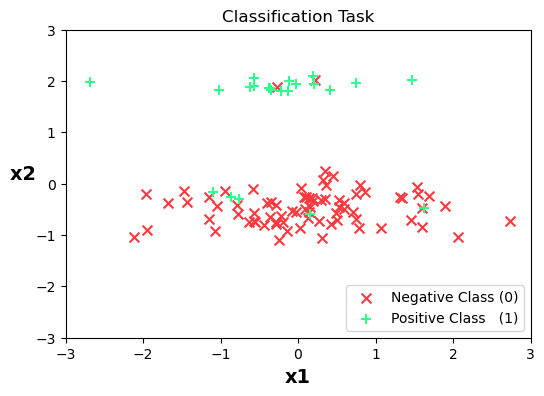

In [11]:
# Create Binary Classification Task
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, weights=[0.8,0.2], class_sep=1.5, flip_y=0.1, 
                           random_state=123)

# Normalizes the Features X 
from sklearn.preprocessing import StandardScaler

X_train, y_train = StandardScaler().fit_transform(X), y

# Separate Samples
X_0 = X_train[y_train==0] # y=0 -> Red   -> Negative Class
X_1 = X_train[y_train==1] # y=1 -> Green -> Positive Class

# Plot Training Data
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Classification Task')
plt.scatter(X_0[:,0], X_0[:,1], color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
plt.scatter(X_1[:,0], X_1[:,1], color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
plt.legend(loc='lower right')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

#### FIT kNN CLASSIFIER

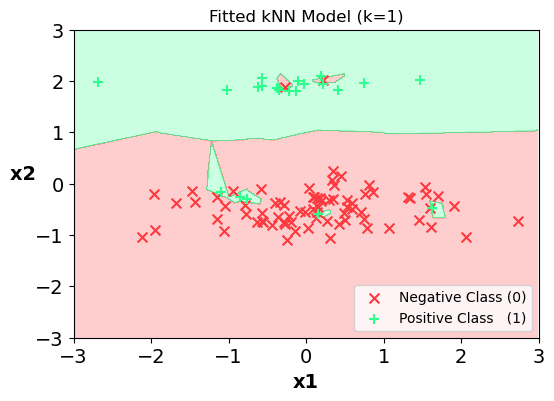

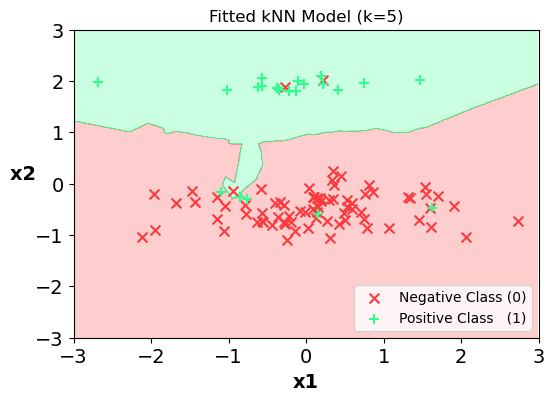

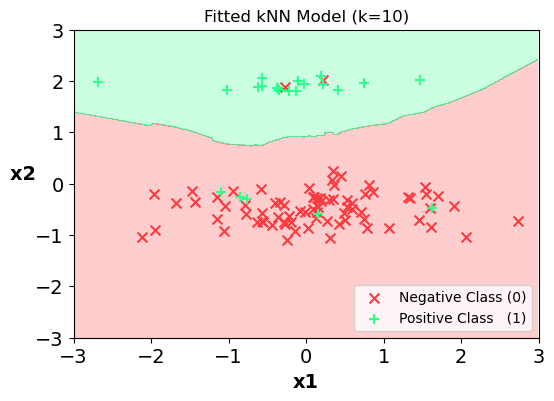

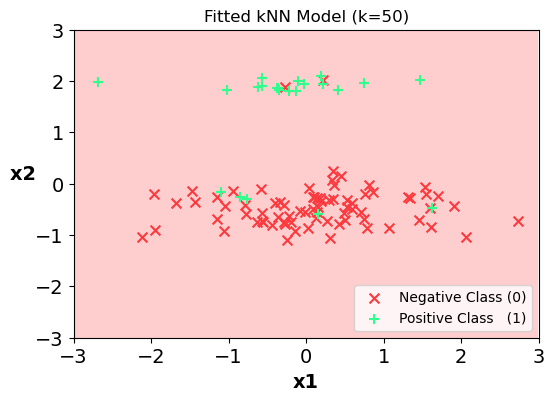

In [12]:
list_k = [1, 5, 10, 50]

for value in list_k:
    
    # Fit kNN Classification Model
    from sklearn.neighbors import KNeighborsClassifier

    model = KNeighborsClassifier(n_neighbors=value)
    model.fit(X_train, y_train)

    # Create Meshgrid of x1, x2 Values
    import numpy as np
    x1 = np.arange(-3, 3, 0.01)
    x2 = np.arange(-3, 3, 0.01)
    xx1, xx2 = np.meshgrid(x1, x2)

    # Evaluate f(X) on Grid
    Z = model.predict(np.c_[xx1.flatten(), xx2.flatten()]).reshape(xx1.shape)

    # Plot Decision Boundary
    %matplotlib inline

    import matplotlib.pyplot as plt
    import matplotlib.colors
    cmap = matplotlib.colors.ListedColormap(['#FC393E', '#2FFF8D'])

    plt.rcParams.update(plt.rcParamsDefault)
    plt.figure(figsize=(6,4))
    plt.title('Fitted kNN Model (k=' + str(value) + ')')
    plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
    plt.scatter(X_0[:,0], X_0[:,1], color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
    plt.scatter(X_1[:,0], X_1[:,1], color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
    plt.legend(loc='lower right')
    plt.xlabel("x1",   fontsize=14, weight='bold')
    plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.show()